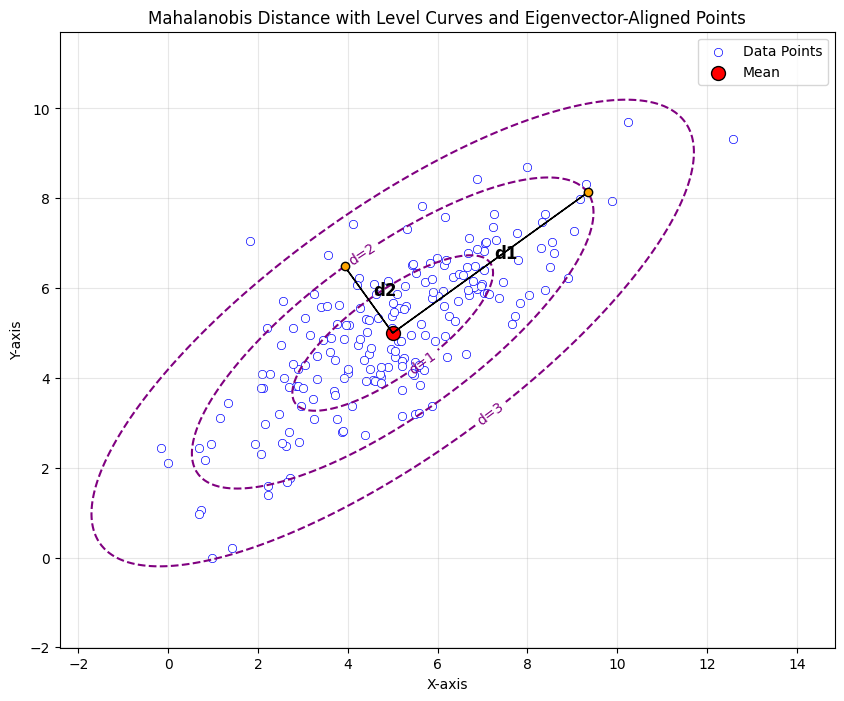

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import mahalanobis

def generate_data(mean, cov, n_points):
    """Generate 2D data points from a multivariate normal distribution."""
    return np.random.multivariate_normal(mean, cov, n_points)

def plot_mahalanobis_with_levels(data, mean, cov):
    """Plot Mahalanobis distance with level curves and annotated points."""
    # Invert the covariance matrix for Mahalanobis distance
    cov_inv = np.linalg.inv(cov)

    # Compute eigenvectors and eigenvalues for the covariance matrix
    eigvals, eigvecs = np.linalg.eig(cov)

    # Create a grid of points for visualization
    x_min, x_max = data[:, 0].min() - 2, data[:, 0].max() + 2
    y_min, y_max = data[:, 1].min() - 2, data[:, 1].max() + 2
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # Compute Mahalanobis distance
    mahalanobis_distances = [mahalanobis(point, mean, cov_inv) for point in grid_points]
    mahalanobis_distances = np.array(mahalanobis_distances).reshape(xx.shape)

    # Plot data points
    plt.figure(figsize=(10, 8))
    plt.scatter(data[:, 0], data[:, 1], facecolors='white', edgecolors='blue', linewidths=0.5, label='Data Points')
    plt.scatter(mean[0], mean[1], c='red', label='Mean', s=100, edgecolors='black')

    # Plot Mahalanobis distance level curves
    levels = [1, 2, 3]
    contours = plt.contour(xx, yy, mahalanobis_distances, levels=levels, colors='purple', linestyles='dashed')
    plt.clabel(contours, inline=True, fontsize=10, fmt="d=%.0f")

    # Annotate specific points on the d=2 level curve aligned with eigenvectors
    points = np.array([
        mean + eigvecs[:, 0] * np.sqrt(4 * eigvals[0]),  # Along first eigenvector
        mean + eigvecs[:, 1] * np.sqrt(4 * eigvals[1])   # Along second eigenvector
    ])

    for i, point in enumerate(points):
        plt.scatter(point[0], point[1], color='orange', edgecolors='black', zorder=5)
        plt.arrow(mean[0], mean[1], point[0] - mean[0], point[1] - mean[1],
                  color='black', width=0.005, head_width=0.05, length_includes_head=True, zorder=4)
        plt.text((point[0] + mean[0]) / 2+0.1, (point[1] + mean[1]) / 2+0.1, f'd{i+1}', fontsize=12, color='black', weight='bold')

    # Add legend and labels
    plt.title('Mahalanobis Distance with Level Curves and Eigenvector-Aligned Points')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend(loc='upper right')
    plt.grid(alpha=0.3)
    plt.axis('equal')
    plt.show()

# Parameters for the multivariate normal distribution
mean = [5, 5]
cov = [[5, 3], [3, 3]]  # Slightly more pronounced covariance
n_points = 200

# Generate data and plot
np.random.seed(42)  # For reproducibility
data = generate_data(mean, cov, n_points)
plot_mahalanobis_with_levels(data, mean, cov)
